# <font color="#CE4A06">Linear Regression With Healthcare Cost Dataset</span>

&nbsp;    
<font color="blue">***Healthcare Cost Dataset***</span>  
sex: male / female  
age: age  
bmi: Body mass index ( weight (kg) / height (m<sup>2</sup>) )  
nicotine_addict: yes = smoker, no = non-smoker  
district: residential location  
*healthcare_cost: Individual medical costs billed by a health provider

*outcome variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression as lr
%matplotlib inline

&nbsp;    
#### <font color="blue">**Read Dataset**</span>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/healthcare_cost.csv")
df.head()

,sex,age,bmi,nicotine_addict,district,healthcare_cost
0,female,21,27.900,yes,DT1,16884.92400
1,male,20,33.770,no,DT2,1725.55230
2,male,30,33.000,no,DT2,4449.46200
3,male,35,22.705,no,DT3,21984.47061
4,male,34,28.880,no,DT3,3866.85520


&nbsp;    
#### <font color="blue">**Get Dataset Information**</span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              1338 non-null   object 
 1   age              1338 non-null   int64  
 2   bmi              1338 non-null   float64
 3   nicotine_addict  1338 non-null   object 
 4   district         1338 non-null   object 
 5   healthcare_cost  1338 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


- **Numeric columns**

In [3]:
df.describe()

,age,bmi,healthcare_cost
count,1338.000000,1338.000000,1338.000000
mean,41.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,20.000000,15.960000,1121.873900
25%,29.000000,26.296250,4740.287150
50%,41.000000,30.400000,9382.033000
75%,53.000000,34.693750,16639.912515
max,66.000000,53.130000,63770.428010


- **Categorical columns**

In [4]:
for c in ['sex', 'nicotine_addict', 'district']:
    print(f"---{c}---")
    print(df[c].value_counts(dropna=False))
    print('')

---sex---
sex
male      676
female    662
Name: count, dtype: int64

---nicotine_addict---
nicotine_addict
no     1064
yes     274
Name: count, dtype: int64

---district---
district
DT2    364
DT1    325
DT3    325
DT4    324
Name: count, dtype: int64



&nbsp;    
#### <font color="blue">**Adjust Data Type**</span>

In [5]:
df = df.astype({
    'sex': 'category',
    'nicotine_addict': 'category',
    'district': 'category'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              1338 non-null   category
 1   age              1338 non-null   int64   
 2   bmi              1338 non-null   float64 
 3   nicotine_addict  1338 non-null   category
 4   district         1338 non-null   category
 5   healthcare_cost  1338 non-null   float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 35.8 KB


&nbsp;    
#### <font color="blue">**Exploratory Data Analysis (EDA)**</span>

**Data Visualization**

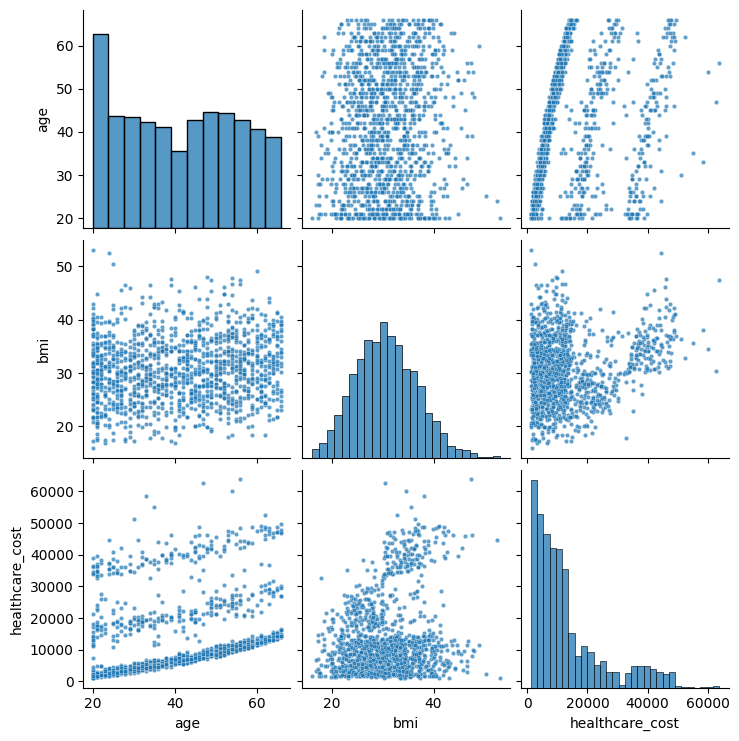

In [ ]:
pl = sns.pairplot(df, plot_kws={'alpha': 0.7, 's': 10})
pl

\
&NewLine;
- ***Gender & healthcare_cost***

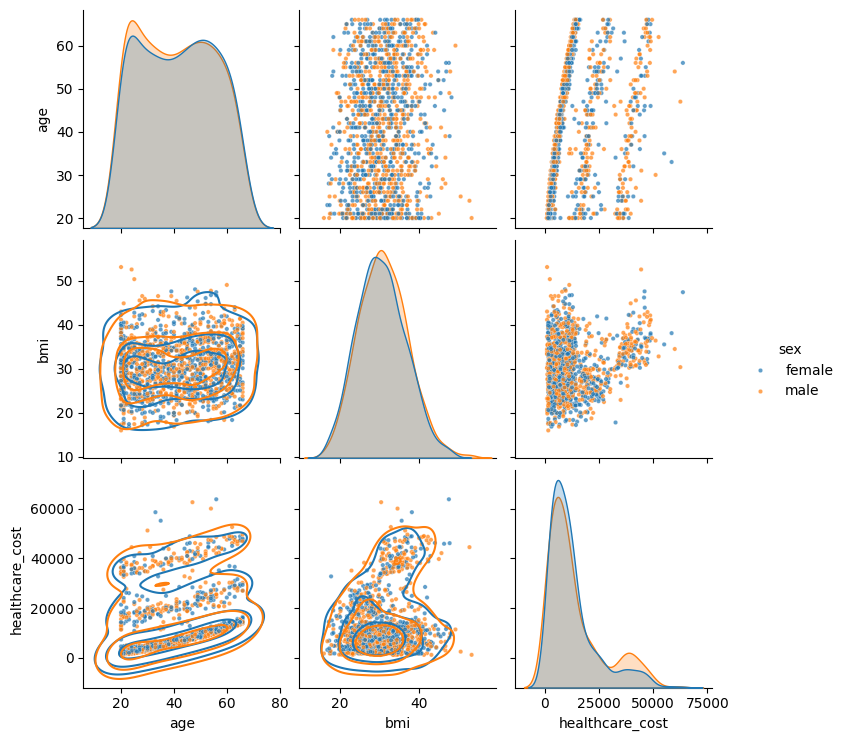

In [ ]:
pl = sns.pairplot(df,
                  hue="sex",
                  diag_kind="kde",
                  plot_kws={
                      'alpha': 0.7,
                      's': 10
                  })
pl.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: xlabel='sex', ylabel='healthcare_cost'>

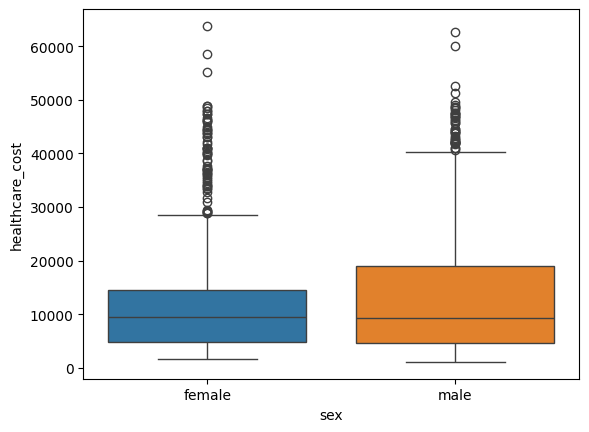

In [ ]:
sns.boxplot(data=df, y="healthcare_cost", x="sex", hue="sex")

\
There are many outliers (we will deal with them later).

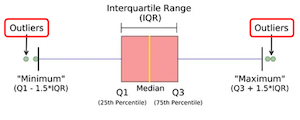

&nbsp;    
**Means of 'healthcare_cost' according to gender groups**

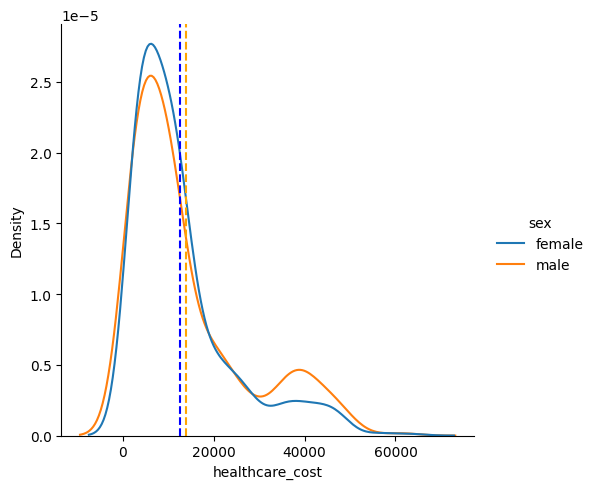

In [ ]:
sns.displot(data=df, x='healthcare_cost', hue='sex', kind='kde')
plt.axvline(x=np.mean(df.healthcare_cost[df.sex=='female']), c='b', ls='--')
plt.axvline(x=np.mean(df.healthcare_cost[df.sex=='male']), c='orange', ls='--')

&nbsp;    
**Test for normality of healthcare_cost according to gender**

In [6]:
stats.shapiro(df.healthcare_cost[df.sex=='female'])

ShapiroResult(statistic=0.8053936070521869, pvalue=1.8303726201913448e-27)

In [7]:
stats.shapiro(df.healthcare_cost[df.sex=='male'])

ShapiroResult(statistic=0.8228138292503264, pvalue=1.1788190457240461e-26)

Both p-values indicate non-normality.

&nbsp;    
**Mean comparison of healthcare_cost according to gender**  
\*Note: it take very long time to compute with number of sample ~>100, so we just use the first 100.

In [8]:
u_score, p_value = stats.mannwhitneyu(x = df.healthcare_cost[df.sex=='female'][1:100],
                                      y = df.healthcare_cost[df.sex=='male'][1:100],
                                      alternative='two-sided')
print("u-score:", u_score)
print("p-value", p_value)

u-score: 4551.0
p-value 0.38666902408211146


\
&NewLine;
- ***District & healthcare_cost***

In [ ]:
pl = sns.pairplot(df,
                  hue="district",
                  diag_kind="kde",
                  plot_kws={
                      'alpha': 0.7,
                      's': 10
                  })
pl.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: xlabel='district', ylabel='healthcare_cost'>

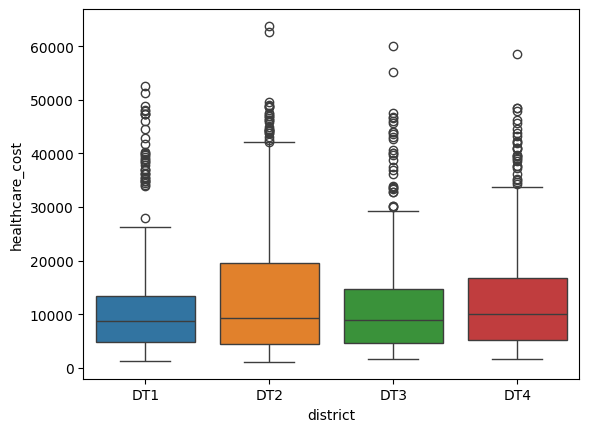

In [ ]:
sns.boxplot(data=df,
            y="healthcare_cost",
            x="district",
            hue="district")

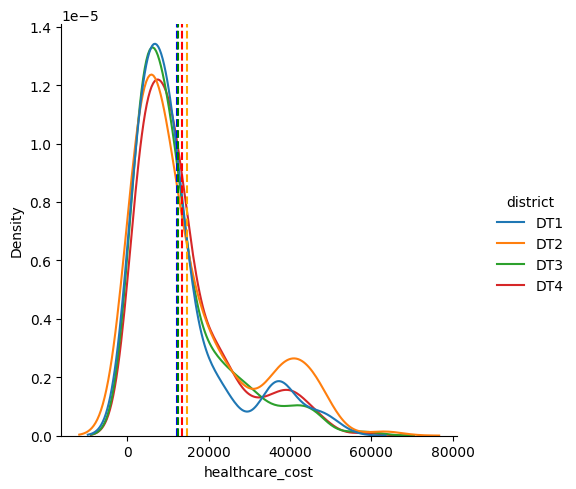

In [ ]:
sns.displot(data=df, x='healthcare_cost', hue='district', kind='kde')
plt.axvline(x=np.mean(df.healthcare_cost[df.district=='DT1']), c='b', ls='--')
plt.axvline(x=np.mean(df.healthcare_cost[df.district=='DT2']), c='orange', ls='--')
plt.axvline(x=np.mean(df.healthcare_cost[df.district=='DT3']), c='g', ls='--')
plt.axvline(x=np.mean(df.healthcare_cost[df.district=='DT4']), c='r', ls='--')

\
&NewLine;
- ***Nicotine_addict & healthcare_cost***

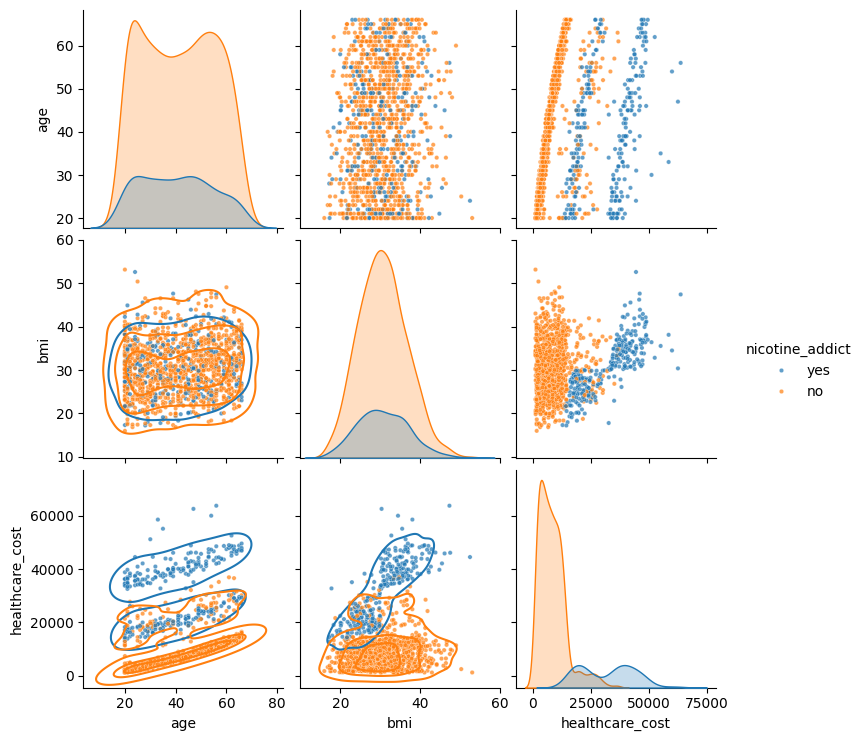

In [ ]:
pl = sns.pairplot(df,
                  hue="nicotine_addict",
                  diag_kind="kde",
                  plot_kws={
                      'alpha': 0.7,
                      's': 10
                  })
pl.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: xlabel='nicotine_addict', ylabel='healthcare_cost'>

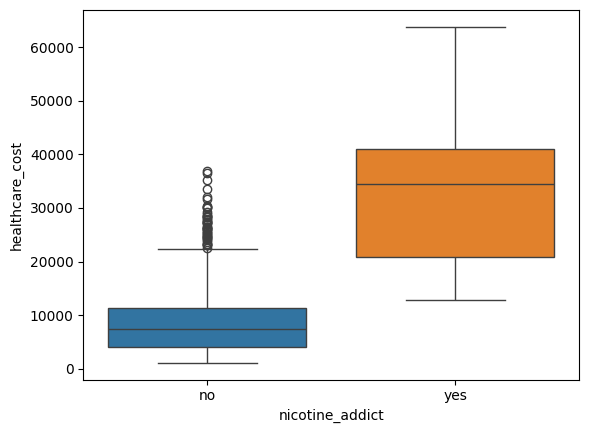

In [ ]:
sns.boxplot(data=df,
            y="healthcare_cost",
            x="nicotine_addict",
            hue="nicotine_addict")

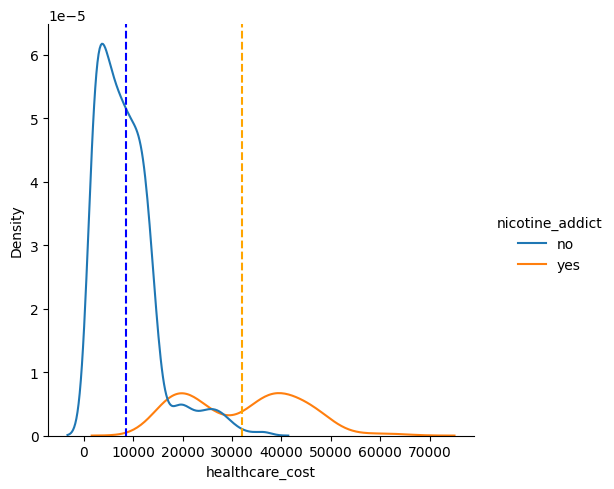

In [ ]:
sns.displot(data=df, x='healthcare_cost', hue='nicotine_addict', kind='kde')
plt.axvline(x=np.mean(df.healthcare_cost[df.nicotine_addict=='yes']), c='orange', ls='--')
plt.axvline(x=np.mean(df.healthcare_cost[df.nicotine_addict=='no']), c='b', ls='--')

<Axes: xlabel='age', ylabel='healthcare_cost'>

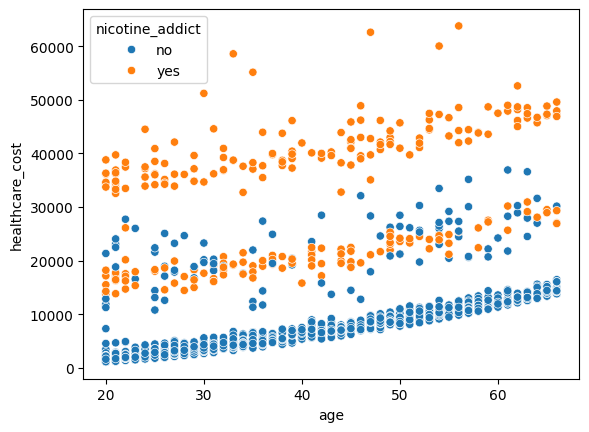

In [ ]:
sns.scatterplot(data=df,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")

<Axes: xlabel='age', ylabel='healthcare_cost'>

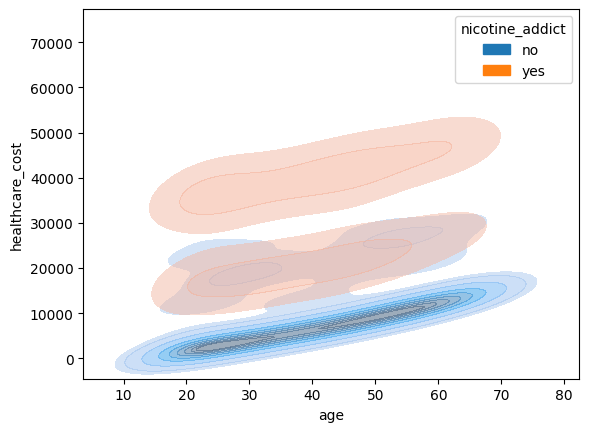

In [ ]:
sns.kdeplot(data=df,
            y="healthcare_cost",
            x="age",
            hue="nicotine_addict",
            alpha=0.5,
            fill=True)

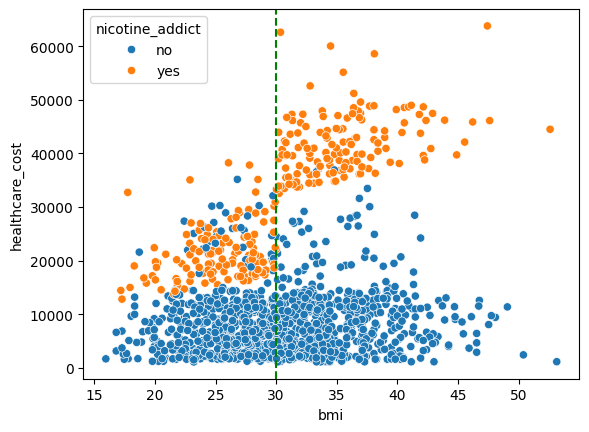

In [9]:
sns.scatterplot(data=df,
                y="healthcare_cost",
                x="bmi",
                hue="nicotine_addict")
plt.axvline(x=30, c='g', ls='--')

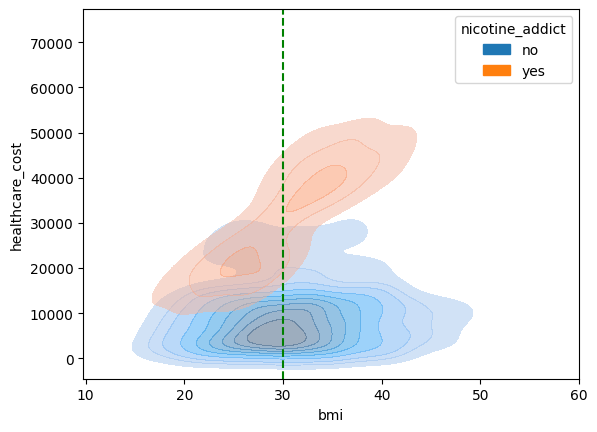

In [10]:
sns.kdeplot(data=df,
            y="healthcare_cost",
            x="bmi",
            hue="nicotine_addict",
            alpha=0.5,
            fill=True)
plt.axvline(x=30, c='g', ls='--')

\
&NewLine;
- ***Age + bmi & healthcare_cost***

&nbsp;    
**Check normality**

In [11]:
cols = ['bmi', 'age', 'healthcare_cost']
for c in cols:
    print(c+":")
    print(stats.shapiro(df[c]))
    print('')

bmi:
ShapiroResult(statistic=0.9938864621676107, pvalue=2.60468368798344e-05)

age:
ShapiroResult(statistic=0.9447009637825445, pvalue=5.69204692845418e-22)

healthcare_cost:
ShapiroResult(statistic=0.8146881157362383, pvalue=1.1505226334932036e-36)



Data in 'bmi', 'age', and 'healthcare_cost' are not normally distributed.

&nbsp;    
**Calculate correlation coefficients**

In [12]:
corr = df.corr(method='spearman', numeric_only=True)
corr

,age,bmi,healthcare_cost
age,1.000000,0.107736,0.534392
bmi,0.107736,1.000000,0.119396
healthcare_cost,0.534392,0.119396,1.000000


<Axes: >

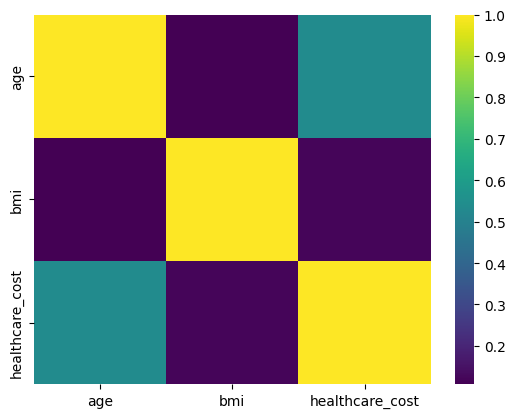

In [ ]:
sns.heatmap(corr, cmap='viridis')

&nbsp;    
**Grouping by 'nicotine_addict'**

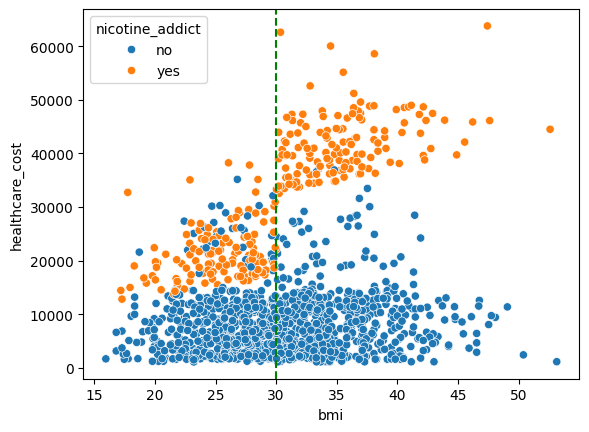

In [ ]:
sns.scatterplot(data=df,
                y="healthcare_cost",
                x="bmi",
                hue="nicotine_addict")
plt.axvline(x=30, c='g', ls='--')

We can see that there is group separation at bmi=30.

&nbsp;    
**Create new column 'bmi_30' as a categorical column.**

In [ ]:
df['bmi_30'] = np.where(df.bmi >= 30, 'Y', 'N')

In [ ]:
df.head()

,sex,age,bmi,nicotine_addict,district,healthcare_cost,bmi_30
0,female,21,27.900,yes,DT1,16884.92400,N
1,male,20,33.770,no,DT2,1725.55230,Y
2,male,30,33.000,no,DT2,4449.46200,Y
3,male,35,22.705,no,DT3,21984.47061,N
4,male,34,28.880,no,DT3,3866.85520,N


<Axes: xlabel='age', ylabel='healthcare_cost'>

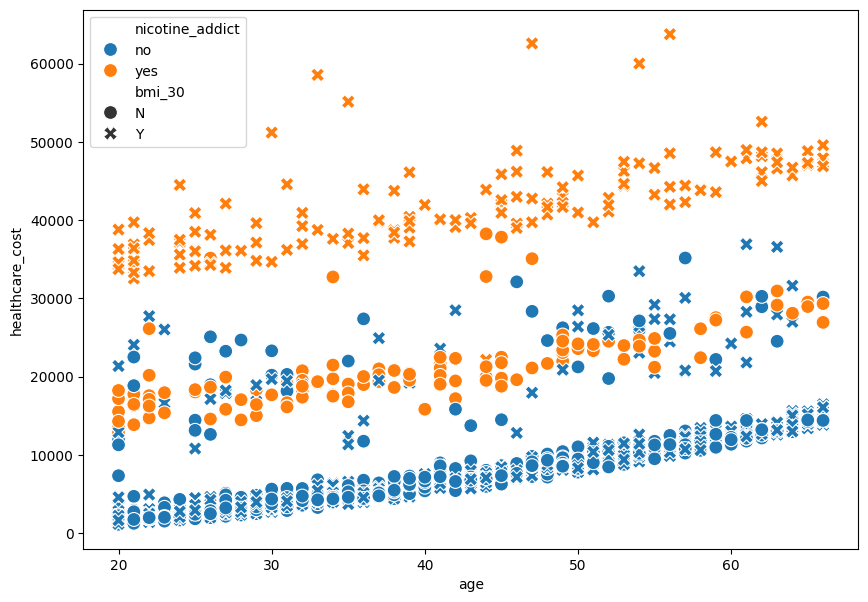

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict",
                style="bmi_30",
                ax=ax,
                s=100)

<Axes: xlabel='age', ylabel='healthcare_cost'>

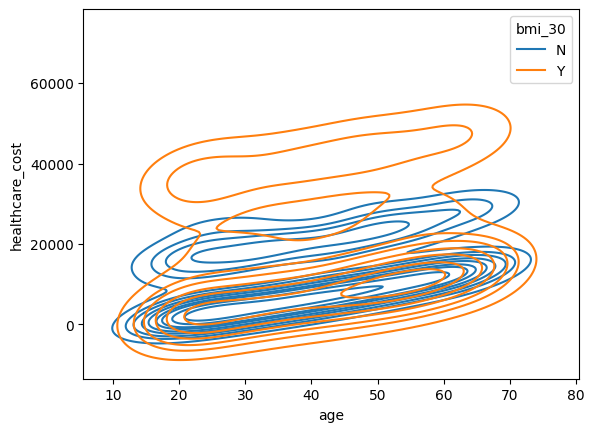

In [ ]:
sns.kdeplot(data=df,
            y="healthcare_cost",
            x="age",
            hue="bmi_30")

&nbsp;    
**Re-calculate correlation coefficients when bmi>30 & nicotine_addict == 'yes'**

In [ ]:
df.query("bmi>30 & nicotine_addict == 'yes'").corr('spearman', numeric_only=True)

,age,bmi,healthcare_cost
age,1.000000,0.053070,0.811495
bmi,0.053070,1.000000,0.416429
healthcare_cost,0.811495,0.416429,1.000000


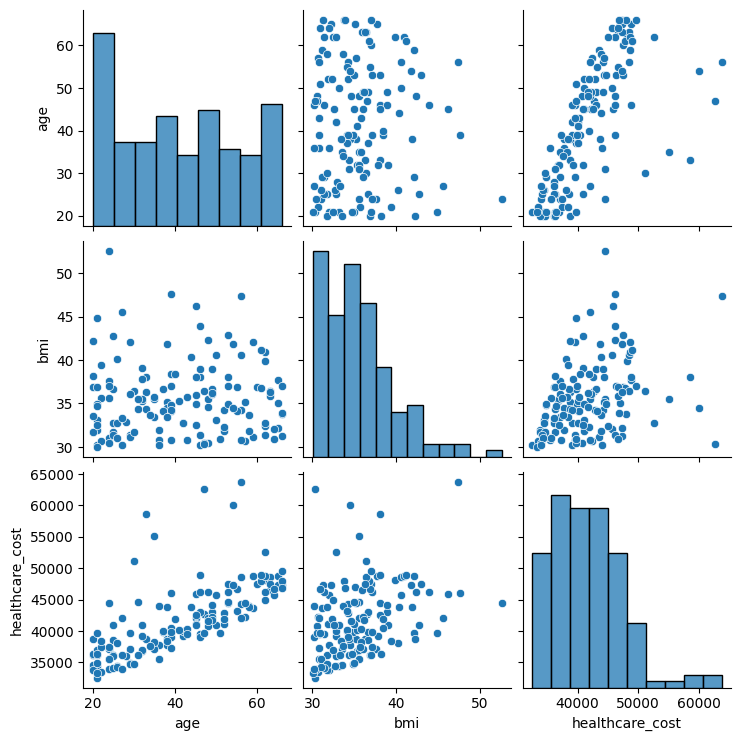

In [ ]:
sns.pairplot(data=df.query("bmi>30 & nicotine_addict == 'yes'"))

&nbsp;    
**Re-calculate correlation coefficients when bmi>30 & nicotine_addict == 'no'**

In [13]:
df.query("bmi>30 & nicotine_addict == 'no'").corr('spearman',  numeric_only=True)

,age,bmi,healthcare_cost
age,1.000000,0.069178,0.812002
bmi,0.069178,1.000000,0.038550
healthcare_cost,0.812002,0.038550,1.000000


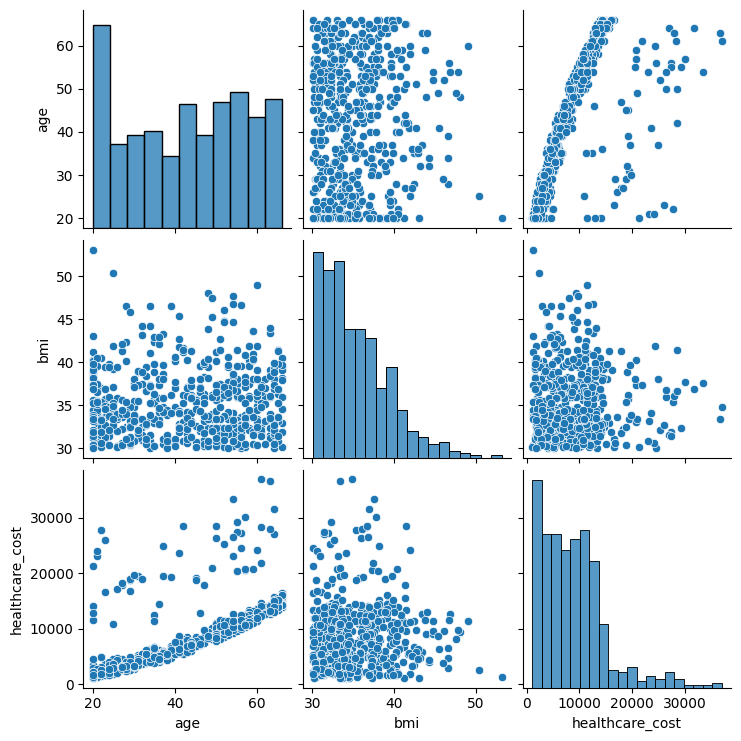

In [14]:
sns.pairplot(data=df.query("bmi>30 & nicotine_addict == 'no'"))

&nbsp;    
#### <font color="blue">**Data Groups**</span>

1.  nicotine_addict=yes bmi \>= 30
2.  nicotine_addict=yes bmi \< 30
3.  nicotine_addict=no

\
Let's start with group 1 and focus on the variable **age**.

In [18]:
df_g1 = df.query('nicotine_addict == "yes" & bmi >= 30')
print(df_g1.shape)
df_g1.head(10)

(145, 6)


,sex,age,bmi,nicotine_addict,district,healthcare_cost
14,male,29,42.13,yes,DT2,39611.75770
19,male,32,35.30,yes,DT1,36837.46700
23,female,36,31.92,yes,DT4,37701.87680
29,male,33,36.30,yes,DT1,38711.00000
30,male,24,35.60,yes,DT1,35585.57600
34,male,30,36.40,yes,DT1,51194.55914
38,male,37,36.67,yes,DT4,39774.27630
39,male,62,39.90,yes,DT1,48173.36100
49,male,38,35.20,yes,DT2,38709.17600
53,male,38,34.43,yes,DT2,37742.57570


<Axes: xlabel='age', ylabel='healthcare_cost'>

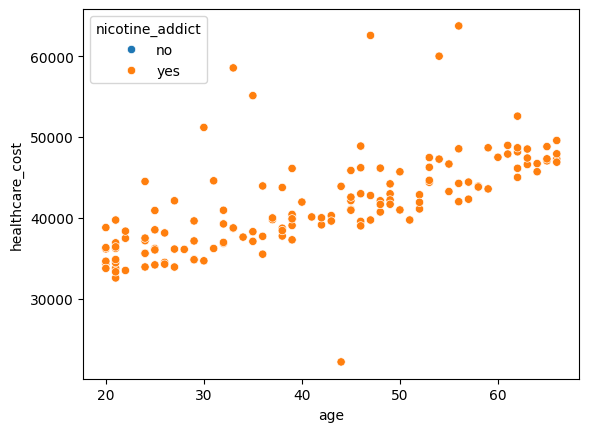

In [ ]:
sns.scatterplot(data=df_g1, y="healthcare_cost", x="age", hue="nicotine_addict")

&nbsp;    
#### <font color="blue">**Build Linear Regression Model**</span>

To implement linear regression with Sklearn, you can use the LinearRegression class from the sklearn.linear_model module.

In [19]:
X = df_g1.age.values.reshape(-1, 1)  # .values resulting a numpy array, .resahpe(-1, 1) converts array dimension into n rows with 1 column (when n = number of values)
y = df_g1.healthcare_cost.values.reshape(-1, 1)

model = lr(fit_intercept=True) # set model to include intercept value
model.fit(X, y)  # perform linear regression
y_pred = model.predict(X)  # make predictions

In [20]:
print("Predictions:\n", pd.Series(y_pred.reshape(1, -1)[0]))
print("Slope:", model.coef_)
#for multi-variate lr: betas = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print("Intercept:", model.intercept_)

Predictions:
 0      38149.253926
1      38992.712471
2      40117.323865
3      39273.865319
4      36743.489683
           ...     
140    43210.005198
141    47989.603621
142    37586.948229
143    35900.031138
144    42366.546652
Length: 145, dtype: float64
Slope: [[281.15284845]]
Intercept: [29995.8213206]


\
We can avoid reshape(-1, 1) by using filter. The result of using filter is a dataframe.  
Note that the result of df_g1.age or df_g1["age"] is a pandas series.

In [21]:
X = df_g1.filter(["age"]) # X=gf_g1[['age']] or X=pd.DataFrame(df_g1.loc[:,'age']) also do the trick
y = df_g1.filter(["healthcare_cost"])
model = lr(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
print("Predictions:\n", pd.Series(y_pred.reshape(1, -1)[0])) #just print y_pred is fine, but to make print result tidier, we can convert numpy array to pandas series
print("Slope:", model.coef_)
#for multi-variate lr: betas = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print("Intercept:", model.intercept_)

Predictions:
 0      38149.253926
1      38992.712471
2      40117.323865
3      39273.865319
4      36743.489683
           ...     
140    43210.005198
141    47989.603621
142    37586.948229
143    35900.031138
144    42366.546652
Length: 145, dtype: float64
Slope: [[281.15284845]]
Intercept: [29995.8213206]


&nbsp;    
#### <font color="blue">**Plot Linear Model**</span>

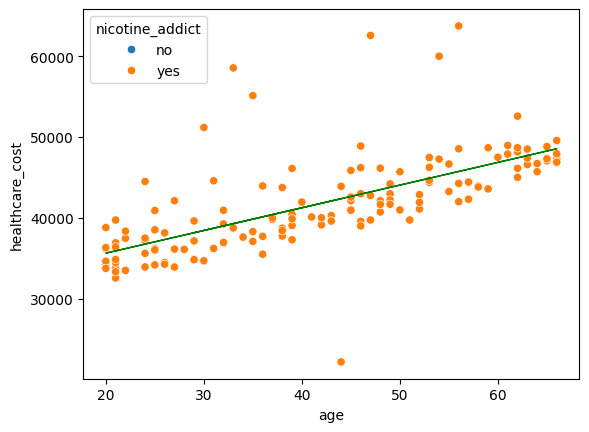

In [ ]:
pl=sns.scatterplot(data=df_g1,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")
pl
plt.plot(X.values, y_pred, color='g', linewidth=1)

&nbsp;    
Is intercept correct?  
From the model.intercept_,  intercept is 29995.82, but in the graph, it ~35000 since the x-axis (age) is not start from 0.  

(0.0, 69.0)

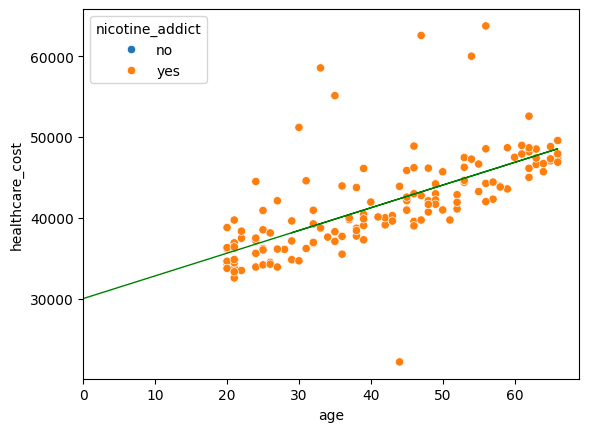

In [22]:
pl=sns.scatterplot(data=df_g1,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")
pl
plt.plot(np.append(X.values,0), np.append(y_pred, model.intercept_), color='g', linewidth=1)
plt.xlim(0, X.age.max()+3)

&nbsp;    
#### <font color="blue">**Plot Actual vs. Predicted 'healthcare_cost'**</span>

In [23]:
#Create dataframe for plot
df_pred = pd.DataFrame({'obs': df_g1.healthcare_cost.values, 'predict': y_pred.reshape(1, -1)[0]})
df_pred.head()

,obs,predict
0,39611.7577,38149.253926
1,36837.4670,38992.712471
2,37701.8768,40117.323865
3,38711.0000,39273.865319
4,35585.5760,36743.489683


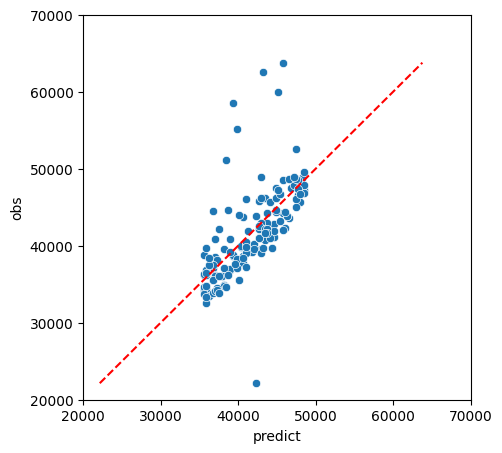

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.plot([min(df_pred.obs), max(df_pred.obs)], [min(df_pred.obs), max(df_pred.obs)], linestyle='--', color='red')
plt.ylim(20000, 70000)
plt.xlim(20000, 70000)
plt.show()

&NewLine;  
#### <font color="blue">**Calculate Model Performance**</span>

Once you have trained a model and have made predictions on the test set, the next step is to know how well has your model performed for making predictions.
There are various metrics to check that. However, mean absolute error, mean squared error, and root mean squared error are three of the most common metrics.

> <u>Mean Absolute Error</u>  
Mean absolute error (MAE) is calculated by taking the average of absolute error obtained by subtracting real values from predicted values. The equation for calculating MAE is:  
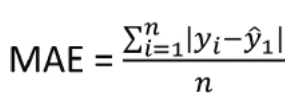

> <u>Mean Squared Error</u>  
Mean squared error (MSE) is similar to MAE. However, error for each record is squared in the case of MSE in order to punish data records with a huge difference between predicted and actual values. The equation to calculate the mean squared error is as follows:  
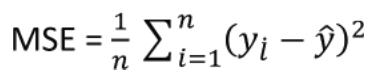

> <u>Root Mean Squared Error</u>  
Root Mean Squared Error is simply the under root of mean squared error and can be calculated as follows:  
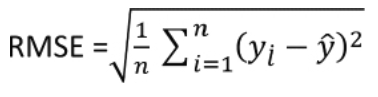

> <u>Coefficient of determination (usually denoted as R²)</u>  
It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.  
As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.
R² can be calculated as follows:  
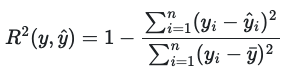


The methods used to find the value for these metrics are available in sklearn.metrics class. The predicted and actual values have to be passed to these methods, as shown in the output.

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 2740.0073205923954
MSE: 20044864.434674297
RMSE: 4477.149141437472
R2: 0.44516766991471524


&nbsp;    
#### <font color="blue">**Removing Outliers**</span>

The easy way to check for outlier is to use bloxplot.  
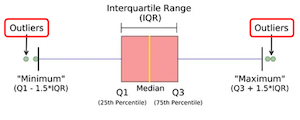

<Axes: ylabel='healthcare_cost'>

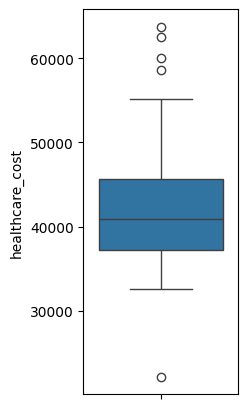

In [27]:
#check outliers
fig, ax = plt.subplots(figsize=(2, 5))  #set size of plot (width, height)
sns.boxplot(data=df_g1,
            y="healthcare_cost",
            whis=1.5,
            ax=ax)

We can see from the box plot that there are outliers.  
Dots outside whiskers are outliers.  
  
\
Whiskers are caculated using Interquartile range (IQR).  
IQR = Quartile3(75 percentile) - Quartile1(25 percentile)

In [28]:
q1, q3 = np.percentile(df_g1.healthcare_cost, [25, 75])
print("q1:", q1)
print("q3:", q3)
IQR = q3 - q1
print("IQR: ", IQR)

q1: 37165.1638
q3: 45702.02235
IQR:  8536.858549999997


\
Generally,  
Upper bound whisker = q3 + 1.5\*IQR  
Lower bound whisker = q - 1.5\*IQR


In [ ]:
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR
print("lower:",lower)
print("upper:",upper)

lower: 24359.875975000006
upper: 58507.31017499999


\
But, as you see from the graph, the lengths of whiskers from both sites are not equal. This is because seaborn adjust the upper and lower to:

In [29]:
upper = df_g1.healthcare_cost[df_g1.healthcare_cost <= (q3 + 1.5*IQR)].max()
lower = df_g1.healthcare_cost[df_g1.healthcare_cost >= (q1 - 1.5*IQR)].min()
print("lower:",lower)
print("upper:",upper)

lower: 32548.3405
upper: 55135.40209


\
Now, we will keep rows that healthcare_cost < upper and healthcare_cost > lower:

In [30]:
df_g1_remOut = df_g1[(df_g1.healthcare_cost < upper) &
                     (df_g1.healthcare_cost > lower)]
df_g1_remOut.shape

(138, 6)

\
Plot data after removing outliers.

(20000.0, 65000.0)

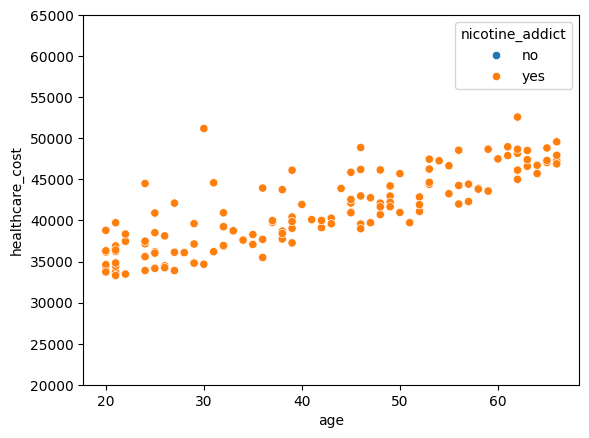

In [31]:
sns.scatterplot(data=df_g1_remOut,
                y="healthcare_cost",
                x="age",
                hue="nicotine_addict")
plt.ylim(20000, 65000)

&nbsp;    
<font color="blue">**Create Model After Removing Outliers**</span>

In [32]:
X = df_g1_remOut.filter(["age"], axis=1)
y = df_g1_remOut.filter(["healthcare_cost"], axis=1)
model = lr(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

Slope: [[269.49364143]]
Intercept: [30016.57644795]


\
Get model performance:

In [33]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

MAE: 1954.2666267882958
MSE: 6709215.346144308
RMSE: 2590.2153088390755
R2: 0.6914109128942981


(20000.0, 65000.0)

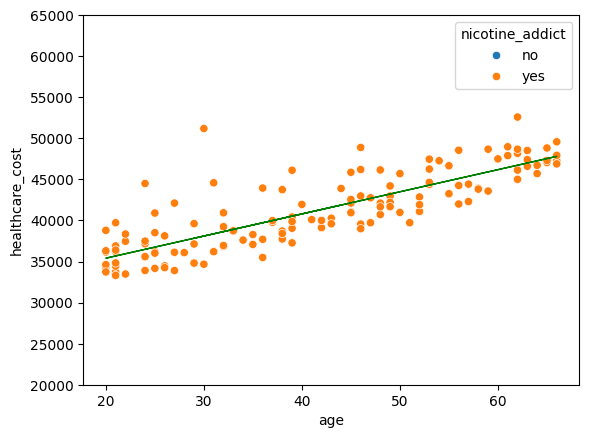

In [34]:
pl = sns.scatterplot(data=df_g1_remOut,
                     y="healthcare_cost",
                     x="age",
                     hue="nicotine_addict")
pl
plt.plot(X.values, y_pred, color='g', linewidth=1)
plt.ylim(20000, 65000)

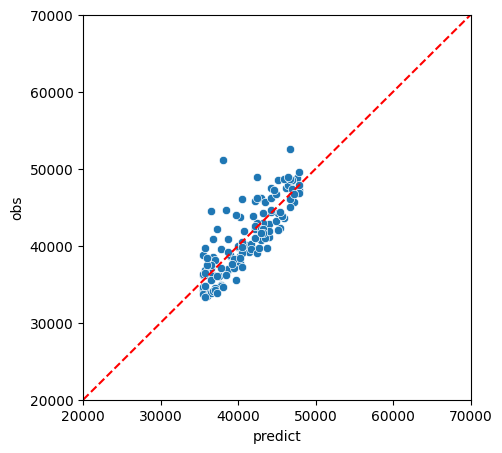

In [35]:
df_pred = pd.DataFrame({'obs': df_g1_remOut.healthcare_cost.values, 'predict': y_pred.reshape(1, -1)[0]})
df_pred.head()

fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_pred,
               x='predict',
               y='obs',
               ax=ax)
plt.plot([20000, 70000], [20000, 70000], linestyle='--', color='red')
plt.ylim(20000, 70000)
plt.xlim(20000, 70000)
plt.show()


&nbsp;    
#### <font color="#439303">*Using The 'statmodels' Library*</span>
Alternatively, we can use the *statmodels* library to create linear regression model and perform prediction.  
\
**Find p-values of slopes/coefficients using statmodels**

In [ ]:
#%pip install statsmodels

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X) #see explanation below
model_sm = sm.OLS(y,X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        healthcare_cost   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     304.7
Date:                Thu, 29 Aug 2024   Prob (F-statistic):           1.55e-36
Time:                        17:18:32   Log-Likelihood:                -1280.4
No. Observations:                 138   AIC:                             2565.
Df Residuals:                     136   BIC:                             2571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.002e+04    672.394     44.641      0.0

\
Why .add_constant()?  
By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

\
To get intercept (& also coeffs), we can access .params attribute.  
The *const* here, shows value of intercept.

In [ ]:
print(model_sm.params)

const    30016.576448
age        269.493641
dtype: float64


\
To get prediction values:

In [ ]:
y_pred_sm = model_sm.predict(X_sm)
print("Predictions:\n", y_pred_sm)

Predictions:
 14      37831.892049
19      38640.372974
23      39718.347539
29      38909.866615
30      36484.423842
            ...     
1291    35675.942918
1301    47264.169499
1308    37292.904767
1313    35675.942918
1323    41874.296671
Length: 138, dtype: float64
